# ProsperLoan Dataset Exploration
## by Volker Felvic Katche Tachin

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> An overview of the data features can be found at (https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

### Sections
- [Univariate Exploration](#Univariate-Exploration)
- [Bivariate Exploration](#Bivariate-Exploration)
- [Multivariate Exploration](#Multivariate-Exploration)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
loan = pd.read_csv("prosperLoanData.csv")
loan.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [4]:
loan.shape

(113937, 81)

In [5]:
#reducing the dataset to contain only the columns i want to explore
columns = ["ListingCreationDate", "BorrowerAPR", "BorrowerRate", "CreditGrade", "Term", "LoanStatus", "ProsperRating (numeric)", "ProsperScore", "ListingCategory (numeric)", "EmploymentStatus", "IncomeRange", "TotalProsperLoans", "TotalProsperPaymentsBilled", "Recommendations"]
loan = loan[columns]

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingCreationDate         113937 non-null  object 
 1   BorrowerAPR                 113912 non-null  float64
 2   BorrowerRate                113937 non-null  float64
 3   CreditGrade                 28953 non-null   object 
 4   Term                        113937 non-null  int64  
 5   LoanStatus                  113937 non-null  object 
 6   ProsperRating (numeric)     84853 non-null   float64
 7   ProsperScore                84853 non-null   float64
 8   ListingCategory (numeric)   113937 non-null  int64  
 9   EmploymentStatus            111682 non-null  object 
 10  IncomeRange                 113937 non-null  object 
 11  TotalProsperLoans           22085 non-null   float64
 12  TotalProsperPaymentsBilled  22085 non-null   float64
 13  Recommendation

In [8]:
#saving the trimmed down df
loan.to_csv("master.csv", index = False)

In [9]:
#loading the df
loan = pd.read_csv("master.csv")
loan.head(3)

,ListingCreationDate,BorrowerAPR,BorrowerRate,CreditGrade,Term,LoanStatus,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatus,IncomeRange,TotalProsperLoans,TotalProsperPaymentsBilled,Recommendations
0,2007-08-26 19:09:29.263000000,0.16516,0.158,C,36,Completed,NaN,NaN,0,Self-employed,"$25,000-49,999",NaN,NaN,0
1,2014-02-27 08:28:07.900000000,0.12016,0.092,NaN,36,Current,6.0,7.0,2,Employed,"$50,000-74,999",NaN,NaN,0
2,2007-01-05 15:00:47.090000000,0.28269,0.275,HR,36,Completed,NaN,NaN,0,Not available,Not displayed,NaN,NaN,0


In [10]:
#changing the inappropriate data types

loan.ListingCreationDate = pd.to_datetime(loan.ListingCreationDate)

In [11]:
num_vars = ["BorrowerAPR", "BorrowerRate", "IncomeRange"]
cat_vars = ["CreditGrade", "Term", "LoanStatus", "ProsperRating", "ProsperScore", "ListingCategory", "EmploymentStatus", "TotalProsperLoans", "TotalProsperPaymentsBilled"]

### What is the structure of your dataset?

> There are 113937 records and 81 features

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are BorrowerRate and BorrowerAPR

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCreationDate, CreditGrade, Term, LoanStatus, ProsperRating (numeric), ProsperScore, ListingCatergory, EmploymentStatus, IncomeRange, TotalProsperLoans, TotalProsperPaymentsBilled, Recommendations

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


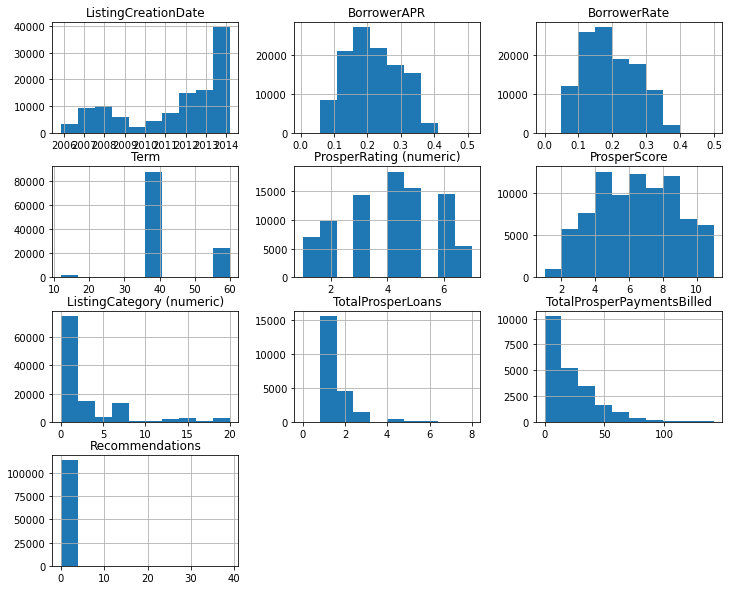

In [12]:
#plotting general histogram of numeric variables

loan.hist(figsize = [12, 10]);

### Borrower APR distribution

In [13]:
apr_xticks = np.arange(0, loan.BorrowerAPR.max(), 0.05)
apr_xticks = apr_xticks[0:10]
apr_xlabels = ["{:.2f}".format(v) for v in apr_xticks]

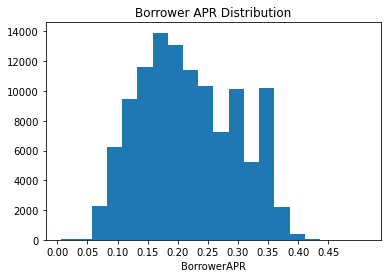

In [14]:
plt.hist(data = loan, x = "BorrowerAPR", bins = 20)
plt.xticks(apr_xticks, apr_xlabels)
plt.title("Borrower APR Distribution")
plt.xlabel("BorrowerAPR");

### Borrower Rate Distribution

In [15]:
xticks = np.arange(0, loan.BorrowerRate.max(), 0.05)
labels = ["{:.2f}".format(v) for v in xticks]

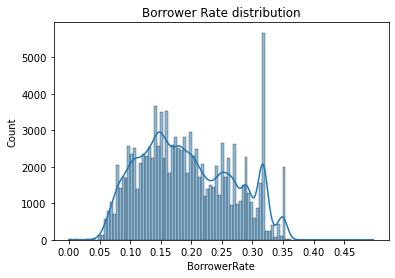

In [16]:
sb.histplot(data = loan, x = "BorrowerRate", kde = True)
plt.xticks(xticks, labels)
plt.title("Borrower Rate distribution");

### Credit Grades

In [24]:
#function to plot countplots
def count_plot(df,xvar,colors,order):
    sb.countplot(data=df,x=xvar,color=colors,order=order)

In [18]:
cred_ord = loan.CreditGrade.value_counts().index

In [19]:
base_color = sb.color_palette()[0]

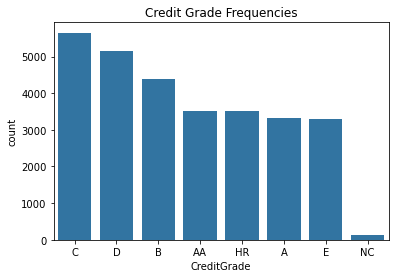

In [25]:
count_plot(loan, "CreditGrade", base_color, order = cred_ord)
plt.title("Credit Grade Frequencies");

### Loan Status

In [26]:
status_ord = loan.LoanStatus.value_counts().index

In [27]:
loan_counts = loan.LoanStatus.value_counts()
n_loans = loan.LoanStatus.value_counts().sum()

max_loan_ct = loan_counts[0]

max_prop = max_loan_ct / n_loans

xtick_props = np.arange(0, max_prop, 0.02)
xtick_lab = ["{:0.2f}".format(v) for v in xtick_props]

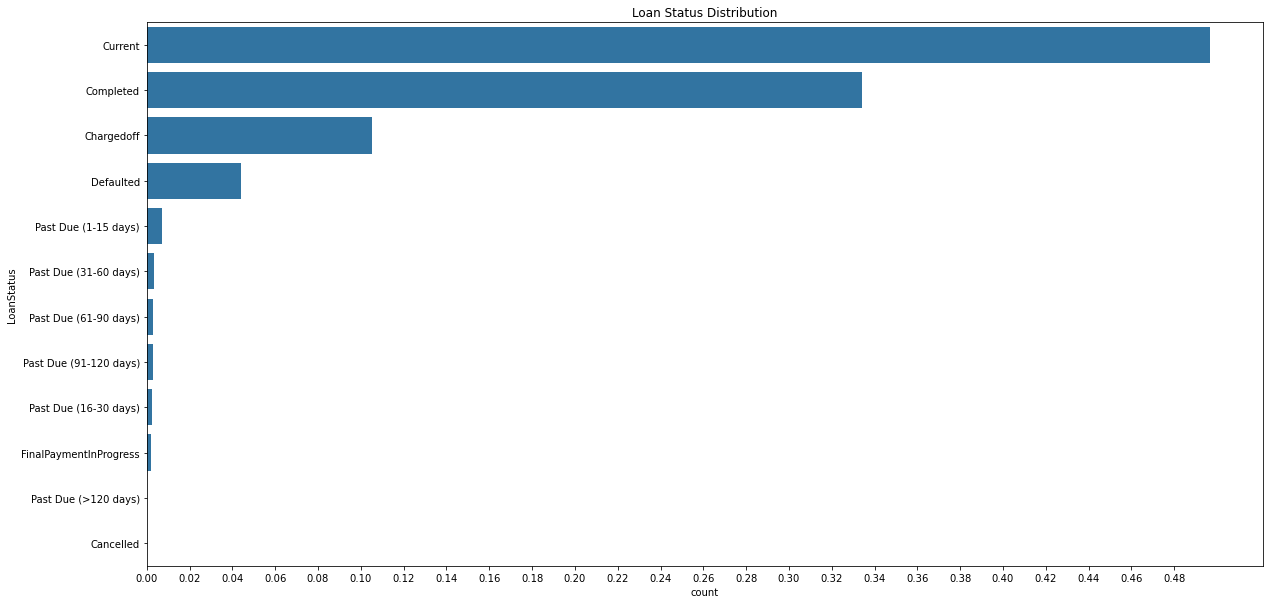

In [28]:
plt.figure(figsize = [20, 10])
sb.countplot(data = loan, y = "LoanStatus", color = base_color, order = status_ord)
plt.xticks(xtick_props * n_loans, xtick_lab)
plt.title("Loan Status Distribution");

### Employment Status

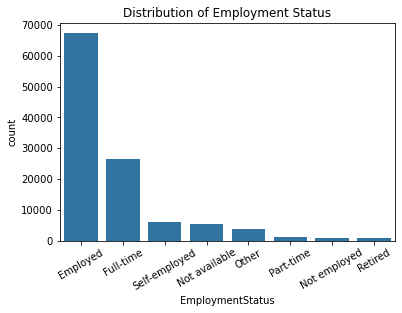

In [30]:
count_plot(loan, "EmploymentStatus", base_color, loan.EmploymentStatus.value_counts().index)
plt.xticks(rotation = 30)
plt.title("Distribution of Employment Status");

### Prosper Score

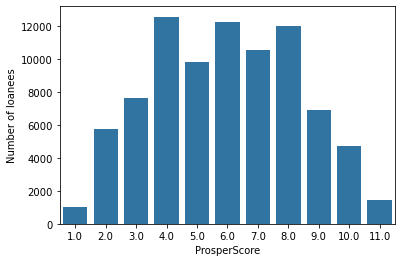

In [32]:
sb.countplot(data = loan, x = "ProsperScore", color = base_color)
plt.ylabel("Number of loanees");

### Listing Category

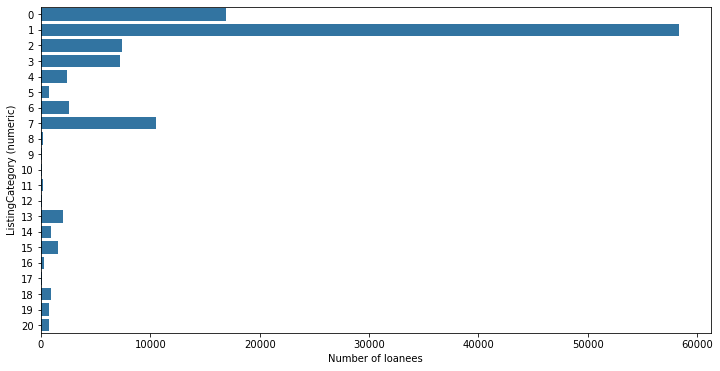

In [33]:
plt.figure(figsize = [12, 6])
sb.countplot(data = loan, y = "ListingCategory (numeric)", color = base_color)
plt.xlabel("Number of loanees");

### Loan Terms

In [34]:
loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [35]:
data = loan.Term.value_counts().values
labels = ["36months", "60months", "12months"]

colors = sb.color_palette("pastel")[0:3]

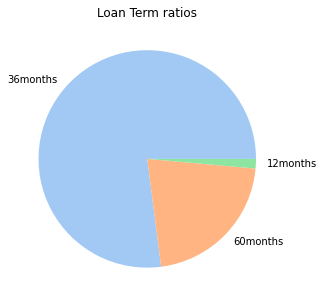

In [36]:
plt.figure(figsize = [10, 5])
plt.pie(data, labels = labels, colors = colors)
plt.title("Loan Term ratios");

### Total Prosper loans

In [37]:
loan.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: TotalProsperLoans, dtype: int64

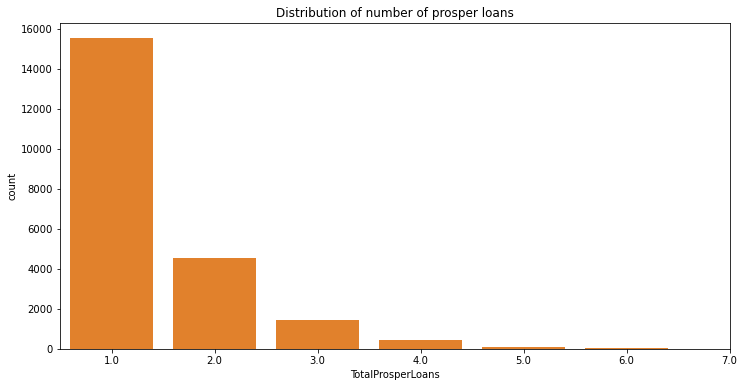

In [38]:
plt.figure(figsize = [12, 6])
sb.countplot(data = loan, x = "TotalProsperLoans", color = sb.color_palette()[1])
plt.title("Distribution of number of prosper loans")
plt.xlim((0.5, 7));

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerAPR and BorrowerRate column appears to be mostly normally distributed.
> Most of the loans have a credir grade between C, D, and B
> A little short of 48% of loans are current. 32% of them are completed
> Most loaners are employed, followed by full-time

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to set the order for the unique values of certain features.
> I changed the frequency distributions to relative for the LoanStatus feature.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question: What is the correlation between Borrower Rate and Prosper Score

#### Visualisation

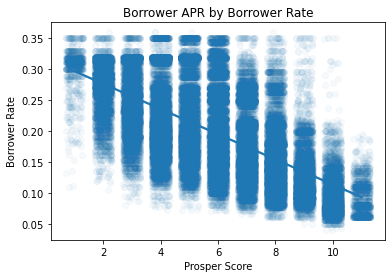

In [39]:
sb.regplot(data = loan, x = "ProsperScore", y = "BorrowerRate", x_jitter= 0.3, scatter_kws={'alpha':1/30})
plt.title("Borrower APR by Borrower Rate")
plt.xlabel("Prosper Score")
plt.ylabel("Borrower Rate");

### Observation

- The lower prosper scores seem to have higher Borrower rates compared to the higher prosper scores

### Question: How does Borrower APR vary by Credit Rate

#### Visualisation

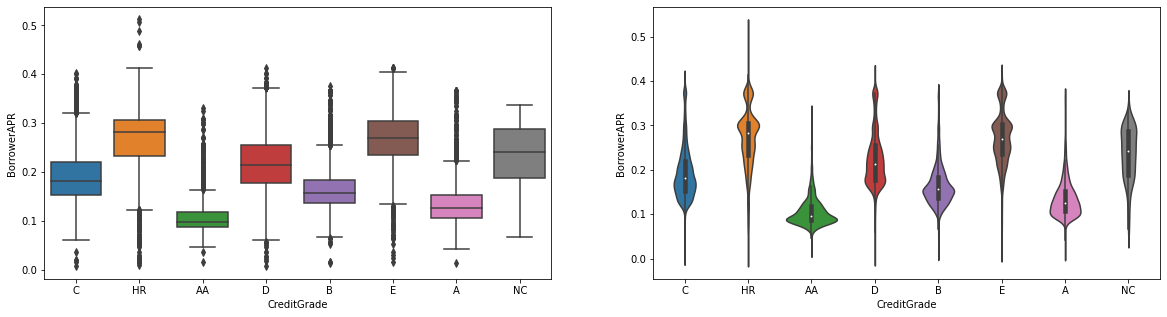

In [40]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data = loan, x = "CreditGrade", y = "BorrowerAPR")


plt.subplot(1, 2, 2)
sb.violinplot(data = loan, x = "CreditGrade", y = "BorrowerAPR");

### Observation

- The lower credit grades seem to have higher borrower APRs, while the higher credit grades have the lower borrower APRs

### Question: How does Borrower Rate vary by Employment Status

#### Visualisation

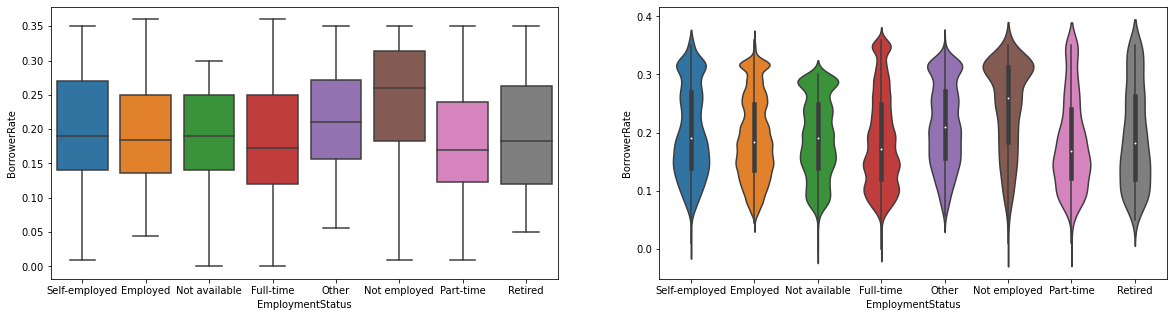

In [41]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data = loan, x = "EmploymentStatus", y = "BorrowerRate")


plt.subplot(1, 2, 2)
sb.violinplot(data = loan, x = "EmploymentStatus", y = "BorrowerRate");

### Observations

- The `Not employed` group of loanees have the highest median statistic for borrower rate.

### Question: What effect does income range have on borrower rate

In [42]:
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [43]:
#creating new column to assign lettered categories to each income range (A = 100,000+, B = 75,000 - 99,999, C = 50,000 - 74,999, 
# D = 25,000 - 49,999, E = 1 - 24,999, F = 0, G = Not employed, H = Not displayed)

loan["IncomeGroup"] = loan.IncomeRange.map({"$100,000+" : "A", "$75,000-99,999" : "B", "$50,000-74,999" : "C", "$25,000-49,999" : "D", "$1-24,999" : "E", "$0" : "F", "Not employed" : "G", "Not displayed" : "H"})

In [44]:
#testing the column addition
loan.head(3)

,ListingCreationDate,BorrowerAPR,BorrowerRate,CreditGrade,Term,LoanStatus,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatus,IncomeRange,TotalProsperLoans,TotalProsperPaymentsBilled,Recommendations,IncomeGroup
0,2007-08-26 19:09:29.263,0.16516,0.158,C,36,Completed,NaN,NaN,0,Self-employed,"$25,000-49,999",NaN,NaN,0,D
1,2014-02-27 08:28:07.900,0.12016,0.092,NaN,36,Current,6.0,7.0,2,Employed,"$50,000-74,999",NaN,NaN,0,C
2,2007-01-05 15:00:47.090,0.28269,0.275,HR,36,Completed,NaN,NaN,0,Not available,Not displayed,NaN,NaN,0,H


#### Visualisation

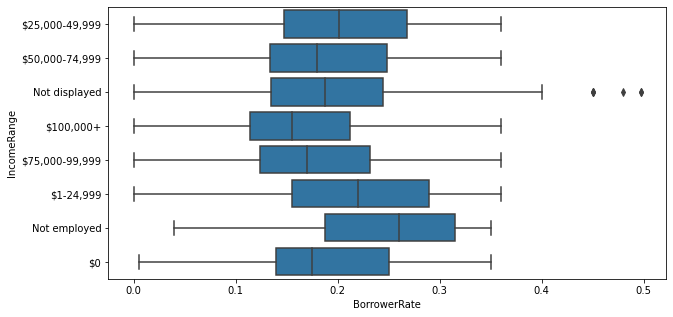

In [45]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = loan, y = "IncomeRange", x = "BorrowerRate", color = base_color);

### Observation

- From the above, we can see that the majority of income groups are evenly distributed. However, the distribution of the 0 dollar income group as well as the not employed group is left skewed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The lower prosper scores seem to have higher Borrower rates compared to the higher prosper scores
> The lower credit grades seem to have higher borrower APRs, while the higher credit grades have the lower borrower APRs

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Surprisingly, the highest income group had the lowest borrower rate

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Taking a look at the correlation between the variables

#### Visualisation

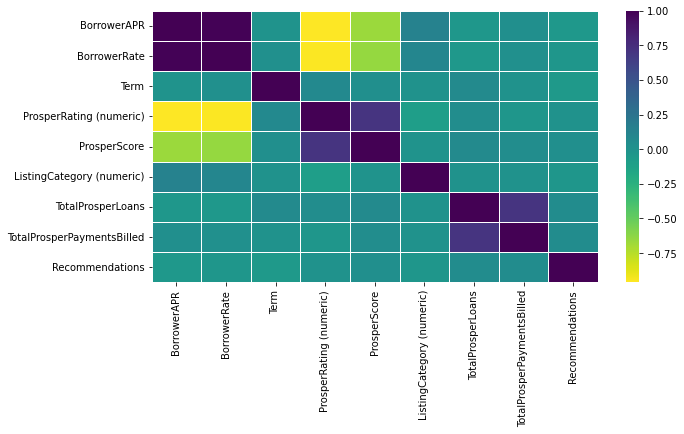

In [46]:
plt.figure(figsize = [10, 5])
sb.heatmap(loan.corr(), linewidths=.5, cmap = "viridis_r");

#### Observation

- There are high correleations between Listing Category and BorrowerRate/BorrowerAPR

### Relationship between Employment status, income range and borrower rate

#### Visualisation

C:\Users\Volker\anaconda3\envs\udacity\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


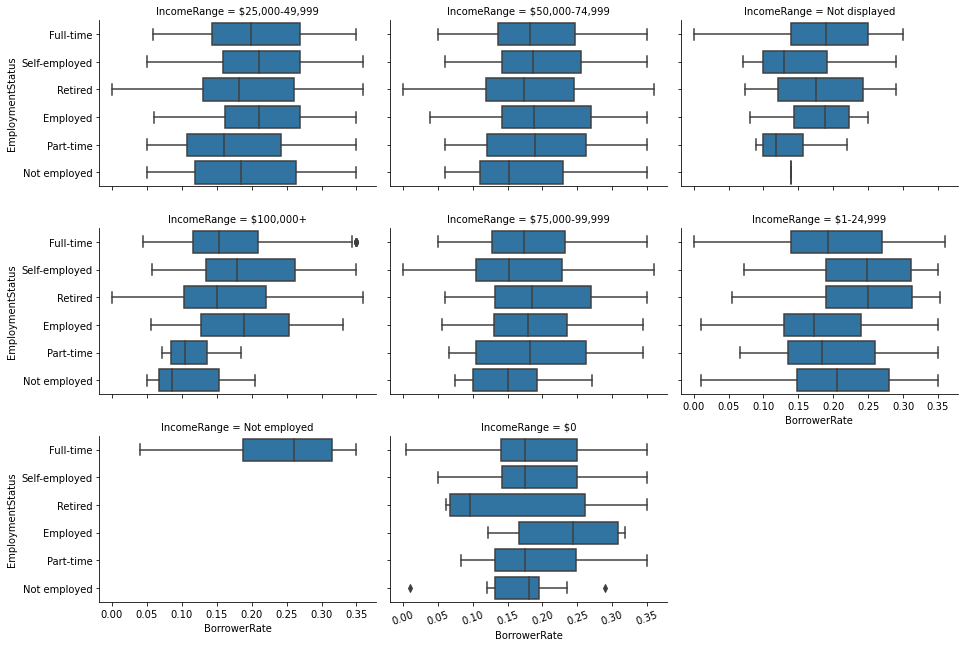

In [47]:
g = sb.FacetGrid(data = loan, col = "IncomeRange", col_wrap = 3, aspect = 1.5)
g.map(sb.boxplot, "BorrowerRate","EmploymentStatus")
plt.xticks(rotation = 20);

#### Observation

- This supports our earlier observations, where the higher income earners, have lower borrower rates, regardless of employment rate. However, 

### Question : What is the relationship between employment status, loan term and borrower rate

#### Visualisation

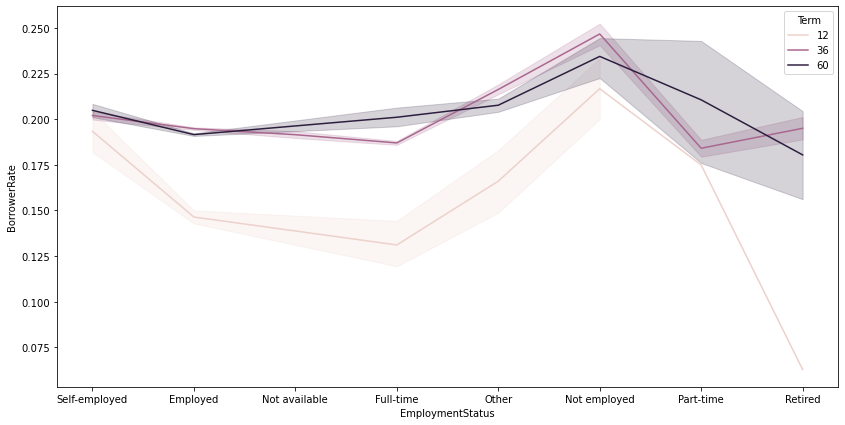

In [48]:
plt.figure(figsize = [14, 7])

sb.lineplot(data = loan, x = "EmploymentStatus", y = "BorrowerRate", hue = "Term");

#### Observation

- The loanees with the shortest loan terms have the lowest borrower rates, with the lowest beign from the fulltime employed loanees. The highest borrower rate is taken by the loanees without employments, with a 36 month plan

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The loanees with the shortest loan terms have the lowest borrower rates, with the lowest beign from the fulltime employed loanees. The highest borrower rate is taken by the loanees without employments, with a 36 month plan

### Were there any interesting or surprising interactions between features?

> The lowest borrower rate is by the retired loanees, with a 12 month loan term.